In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
novaMatrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Nova_Matrícula_Separada.csv')
rematrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Rematrícula_Separada.csv')

In [3]:
novaMatrícula['Bolsa'] = novaMatrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)
rematrícula['Bolsa'] = rematrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)

In [4]:
unique_sorted = sorted(rematrícula['Unidade'].unique().tolist())

In [5]:
novaMatrícula

,Código Candidato,Data de nascimento,Série,Unidade,Data de Inscrição,Data da matrícula,Tipo,Bolsa (%),Real Anuidade,Diferença,Bolsa
0,CL0002,21/1/2021,Infantil 4,Conceição do Mato Dentro,2024-12-19,2024-12-20,Matrícula nova,"50,00%",15.176,1,50.0
1,CL0019,23/01/2022,Infantil 3,Castelo,2025-01-21,2025-01-27,Matrícula nova,"66,60%",6.672,6,66.6
2,CL0047,19/04/2015,5º ano,Conceição do Mato Dentro,2024-12-02,2024-12-02,Matrícula nova,"100,00%",11.471,0,100.0
3,CL0072,07/09/2022,Infantil 2,Castelo,2024-08-17,2024-12-09,Matrícula nova,"65,00%",8.515,114,65.0
4,CL0102,12/08/2022,Infantil 2,Castelo Manacás,2024-10-31,2025-01-21,Matrícula nova,"63,00%",7.453,82,63.0
...,...,...,...,...,...,...,...,...,...,...,...
1728,CL9940,08/02/2018,2º ano,Lagoa Santa,2025-01-15,2025-01-15,Matrícula nova,"55,00%",11.038,0,55.0
1729,CL9966,29/6/2015,4º ano,Alípio de Melo,2024-10-10,2024-11-19,Matrícula nova,"56,00%",11.106,40,56.0
1730,CL9979,9/7/2014,5º ano bilíngue,Lagoa Santa,2024-08-16,2024-12-20,Matrícula nova,"43,00%",14.421,126,43.0
1731,CL9987,11/04/2017,2º ano,Nova Suíça,2024-10-14,2024-10-24,Matrícula nova,"100,00%",0.000,10,100.0


In [6]:
escolas1 = set(novaMatrícula['Unidade'].unique())
escolas1

{'Alípio de Melo',
 'Carajás',
 'Carlos Prates',
 'Castelo',
 'Castelo Manacás',
 'Conceição do Mato Dentro',
 'Gutierrez',
 'Jaraguá',
 'Jardim Canadá',
 'Lagoa Santa',
 'Mais Belvedere',
 'Mais Buritis',
 'Mais Cidade Nova',
 'Mais Pampulha',
 'Nova Suíça',
 'Ouro Preto',
 'Santa Amélia'}

In [7]:
escolas2 = set(rematrícula['Unidade'].unique())
escolas2

{'Alípio de Melo',
 'Carajás',
 'Carlos Prates',
 'Castelo',
 'Castelo Manacás',
 'Conceição do Mato Dentro',
 'Gutierrez',
 'Jaraguá',
 'Jardim Canadá',
 'Lagoa Santa',
 'Mais Belvedere',
 'Mais Buritis',
 'Mais Cidade Nova',
 'Mais Pampulha',
 'Nova Suíça',
 'Ouro Preto',
 'Ouro Preto Integral',
 'Santa Amélia'}

### Demonstrando quais unidades apresentam as maiores concessões de descontos

##### Unidades das novas matrículas

In [8]:
vetor = []
for escola in escolas1:
    pe = novaMatrícula[novaMatrícula['Unidade'] == escola]['Bolsa'].max()
    if(pe == 100):
        vetor.append(escola)
    print("O maior desconto oferecido da unidade", escola, "é de:", pe, "por cento.")

O maior desconto oferecido da unidade Alípio de Melo é de: 100.0 por cento.
O maior desconto oferecido da unidade Carlos Prates é de: 100.0 por cento.
O maior desconto oferecido da unidade Castelo é de: 100.0 por cento.
O maior desconto oferecido da unidade Mais Cidade Nova é de: 100.0 por cento.
O maior desconto oferecido da unidade Conceição do Mato Dentro é de: 100.0 por cento.
O maior desconto oferecido da unidade Jardim Canadá é de: 70.0 por cento.
O maior desconto oferecido da unidade Mais Belvedere é de: 80.0 por cento.
O maior desconto oferecido da unidade Lagoa Santa é de: 100.0 por cento.
O maior desconto oferecido da unidade Castelo Manacás é de: 100.0 por cento.
O maior desconto oferecido da unidade Jaraguá é de: 64.0 por cento.
O maior desconto oferecido da unidade Mais Pampulha é de: 100.0 por cento.
O maior desconto oferecido da unidade Carajás é de: 100.0 por cento.
O maior desconto oferecido da unidade Nova Suíça é de: 100.0 por cento.
O maior desconto oferecido da uni

Lista das unidades que mais dão descontos

In [9]:
i = 0
while i < len(vetor):
    print(vetor[i])
    i+=1

Alípio de Melo
Carlos Prates
Castelo
Mais Cidade Nova
Conceição do Mato Dentro
Lagoa Santa
Castelo Manacás
Mais Pampulha
Carajás
Nova Suíça
Santa Amélia
Ouro Preto


##### Unidades das rematrículas

In [10]:
for escola in escolas2:
    pe = rematrícula[rematrícula['Unidade'] == escola]['Bolsa'].max()
    print("O maior desconto oferecido da unidade ", escola, "é: ", pe, "por cento.")

O maior desconto oferecido da unidade  Carlos Prates é:  100.0 por cento.
O maior desconto oferecido da unidade  Alípio de Melo é:  100.0 por cento.
O maior desconto oferecido da unidade  Castelo é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Cidade Nova é:  100.0 por cento.
O maior desconto oferecido da unidade  Conceição do Mato Dentro é:  100.0 por cento.
O maior desconto oferecido da unidade  Jardim Canadá é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Belvedere é:  100.0 por cento.
O maior desconto oferecido da unidade  Lagoa Santa é:  100.0 por cento.
O maior desconto oferecido da unidade  Jaraguá é:  100.0 por cento.
O maior desconto oferecido da unidade  Castelo Manacás é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Pampulha é:  100.0 por cento.
O maior desconto oferecido da unidade  Carajás é:  100.0 por cento.
O maior desconto oferecido da unidade  Nova Suíça é:  100.0 por cento.
O maior desconto oferecido da unidade  Guti

Na rematrícula todas as unidades dão descontos que podem ir até 100%.

### Demonstrando a média de desconto das unidades

In [11]:
médiaRematrícula = rematrícula.groupby('Unidade').agg(
    Soma = ('Bolsa', 'sum'),
    numDescontos = ('Bolsa' , 'count')
)

In [12]:
médiaRematrícula['média'] = round(médiaRematrícula['Soma']/médiaRematrícula['numDescontos'])
médiaRematrícula = médiaRematrícula.sort_values(by = 'numDescontos', ascending = False)
médiaRematrícula

,Soma,numDescontos,média
Unidade,,,
Carajás,115573.8,1178,98.0
Alípio de Melo,37024.4,734,50.0
Ouro Preto,27516.6,661,42.0
Lagoa Santa,26029.5,534,49.0
Santa Amélia,25739.7,530,49.0
Gutierrez,15281.7,378,40.0
Carlos Prates,20599.1,365,56.0
Conceição do Mato Dentro,18994.4,352,54.0
Mais Cidade Nova,17220.8,278,62.0


In [13]:
médiaNovaMatrícula = novaMatrícula.groupby('Unidade').agg(
    Soma = ('Bolsa', 'sum'),
    numDescontos = ('Bolsa' , 'count')
)

In [14]:
médiaNovaMatrícula['média'] = round(médiaNovaMatrícula['Soma']/médiaNovaMatrícula['numDescontos'])
médiaNovaMatrícula = médiaNovaMatrícula.sort_values(by = 'numDescontos', ascending = False)
médiaNovaMatrícula

,Soma,numDescontos,média
Unidade,,,
Alípio de Melo,9430.0,166,57.0
Ouro Preto,7506.4,163,46.0
Santa Amélia,8567.8,162,53.0
Lagoa Santa,8429.2,160,53.0
Carlos Prates,7844.8,128,61.0
Conceição do Mato Dentro,6824.4,116,59.0
Mais Cidade Nova,6759.8,98,69.0
Carajás,9050.0,92,98.0
Mais Buritis,5439.6,89,61.0


In [15]:
plt1 = rematrícula.merge(médiaRematrícula, on = 'Unidade', how = 'left')
plt2 = novaMatrícula.merge(médiaNovaMatrícula, on = 'Unidade', how = 'left')
plt1.sort_values(by='Unidade', ascending=True, inplace=True)
plt2.sort_values(by='Unidade', ascending=True, inplace=True)

### Gráficos 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Alípio de Melo'),
  Text(1, 0, 'Carajás'),
  Text(2, 0, 'Carlos Prates'),
  Text(3, 0, 'Castelo'),
  Text(4, 0, 'Castelo Manacás'),
  Text(5, 0, 'Conceição do Mato Dentro'),
  Text(6, 0, 'Gutierrez'),
  Text(7, 0, 'Jaraguá'),
  Text(8, 0, 'Jardim Canadá'),
  Text(9, 0, 'Lagoa Santa'),
  Text(10, 0, 'Mais Belvedere'),
  Text(11, 0, 'Mais Buritis'),
  Text(12, 0, 'Mais Cidade Nova'),
  Text(13, 0, 'Mais Pampulha'),
  Text(14, 0, 'Nova Suíça'),
  Text(15, 0, 'Ouro Preto'),
  Text(16, 0, 'Santa Amélia')])

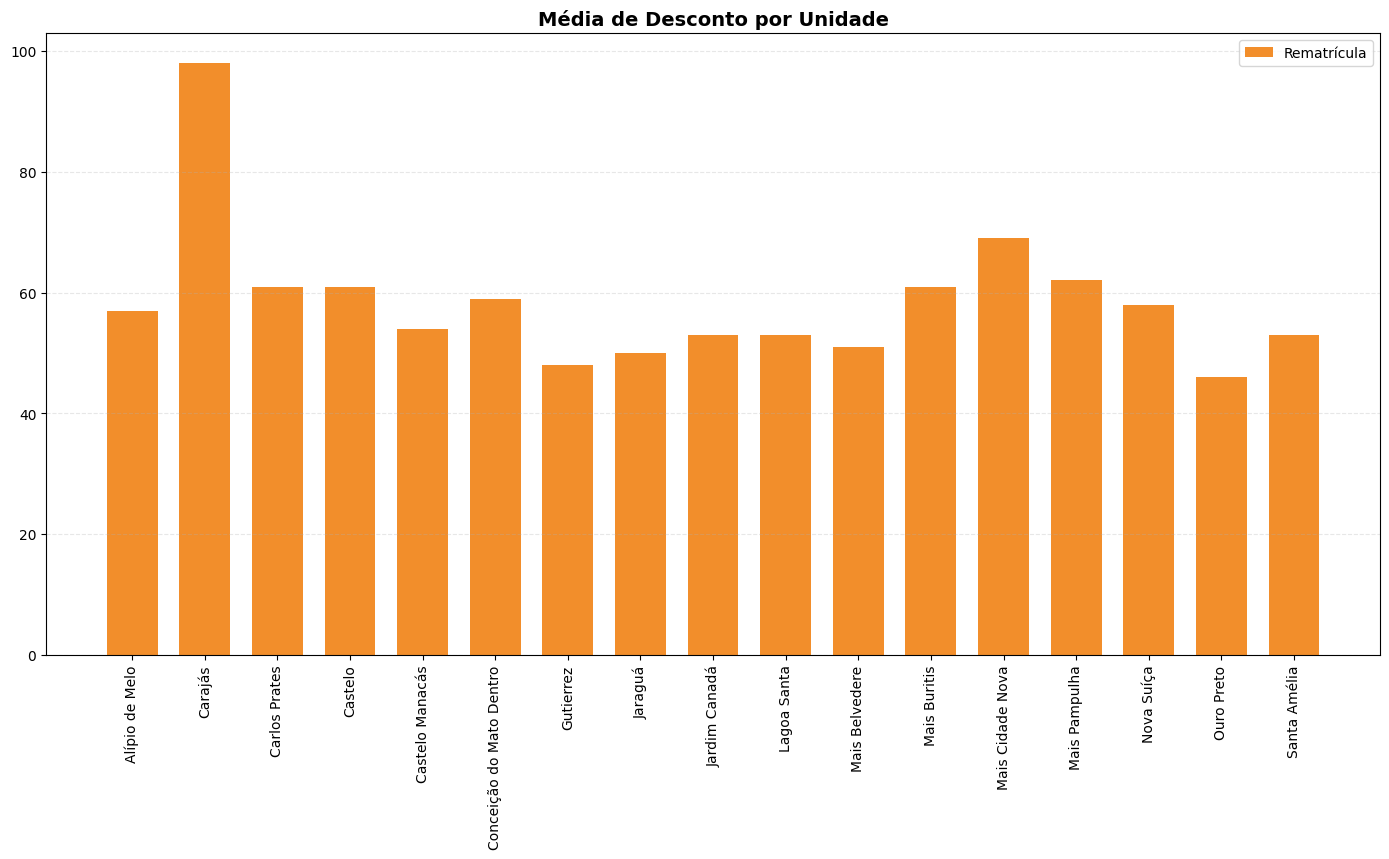

In [16]:
fig = plt.subplots(figsize=(14, 7))

plt.bar(plt2['Unidade'], plt2['média'], color='#F28E2B', alpha = 1, label='Rematrícula', width=0.7)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.yticks(fontsize=10)
plt.title('Média de Desconto por Unidade', fontsize=14, weight='bold')
plt.tight_layout()
plt.legend()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Alípio de Melo'),
  Text(1, 0, 'Carajás'),
  Text(2, 0, 'Carlos Prates'),
  Text(3, 0, 'Castelo'),
  Text(4, 0, 'Castelo Manacás'),
  Text(5, 0, 'Conceição do Mato Dentro'),
  Text(6, 0, 'Gutierrez'),
  Text(7, 0, 'Jaraguá'),
  Text(8, 0, 'Jardim Canadá'),
  Text(9, 0, 'Lagoa Santa'),
  Text(10, 0, 'Mais Belvedere'),
  Text(11, 0, 'Mais Buritis'),
  Text(12, 0, 'Mais Cidade Nova'),
  Text(13, 0, 'Mais Pampulha'),
  Text(14, 0, 'Nova Suíça'),
  Text(15, 0, 'Ouro Preto'),
  Text(16, 0, 'Ouro Preto Integral'),
  Text(17, 0, 'Santa Amélia')])

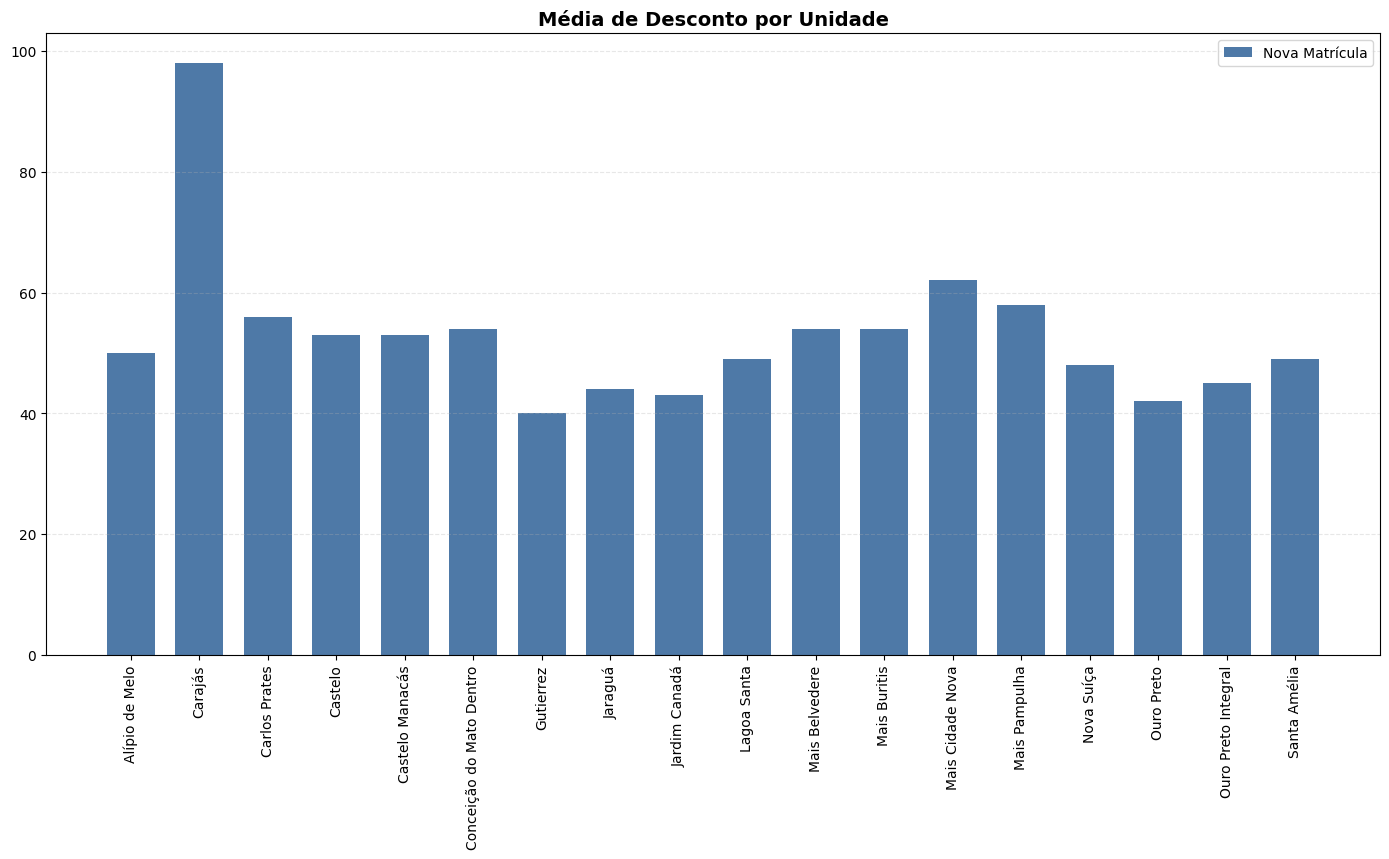

In [17]:
fig = plt.subplots(figsize=(14, 7))

plt.bar(plt1['Unidade'], plt1['média'], color='#4E79A7', alpha = 1, label='Nova Matrícula', width=0.7)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.yticks(fontsize=10)
plt.title('Média de Desconto por Unidade', fontsize=14, weight='bold')
plt.tight_layout()
plt.legend()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Alípio de Melo'),
  Text(1, 0, 'Carajás'),
  Text(2, 0, 'Carlos Prates'),
  Text(3, 0, 'Castelo'),
  Text(4, 0, 'Castelo Manacás'),
  Text(5, 0, 'Conceição do Mato Dentro'),
  Text(6, 0, 'Gutierrez'),
  Text(7, 0, 'Jaraguá'),
  Text(8, 0, 'Jardim Canadá'),
  Text(9, 0, 'Lagoa Santa'),
  Text(10, 0, 'Mais Belvedere'),
  Text(11, 0, 'Mais Buritis'),
  Text(12, 0, 'Mais Cidade Nova'),
  Text(13, 0, 'Mais Pampulha'),
  Text(14, 0, 'Nova Suíça'),
  Text(15, 0, 'Ouro Preto'),
  Text(16, 0, 'Ouro Preto Integral'),
  Text(17, 0, 'Santa Amélia')])

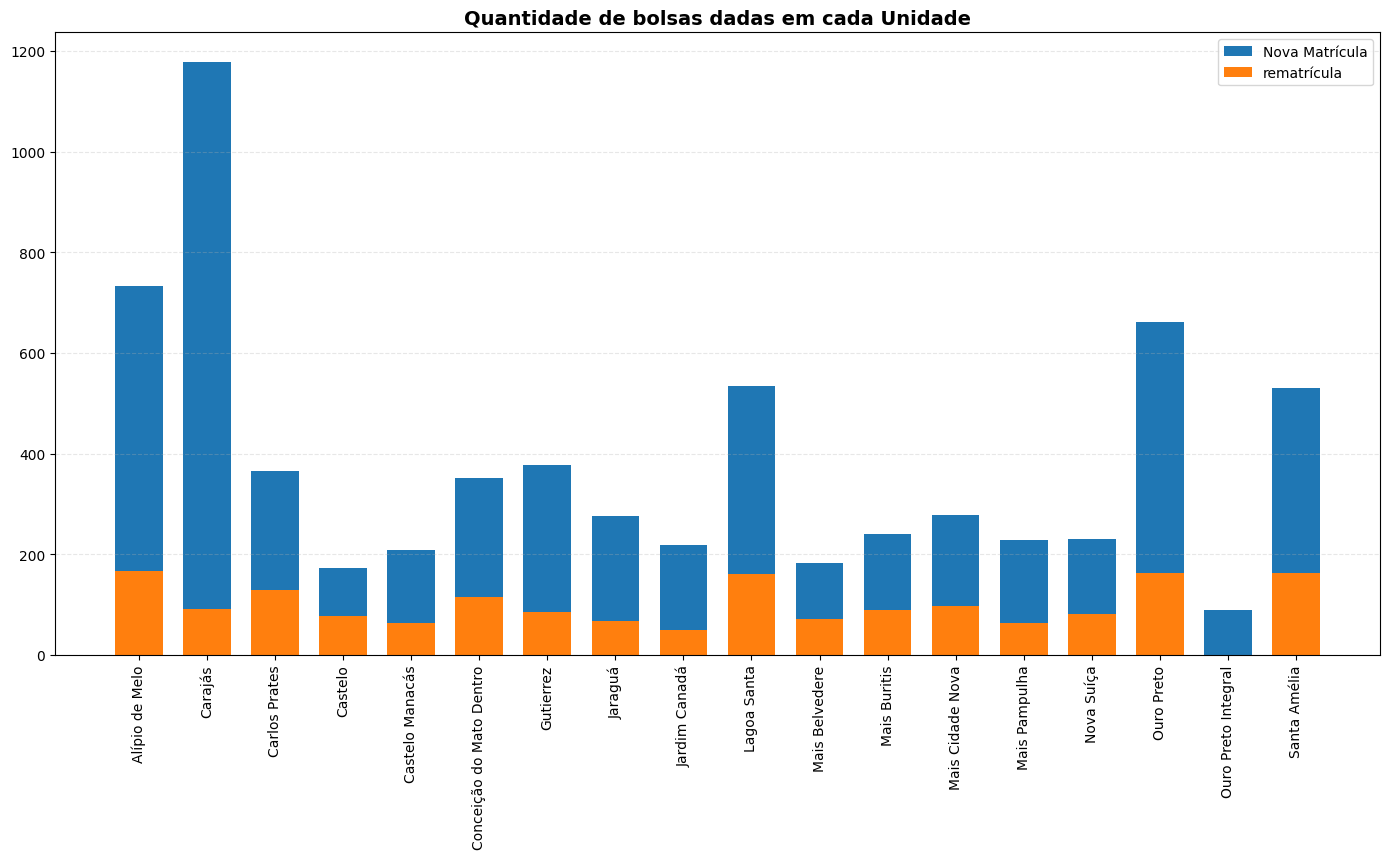

In [18]:
fig = plt.subplots(figsize=(14, 7))

plt.bar(plt1['Unidade'], plt1['numDescontos'], width= 0.7, label = 'Nova Matrícula')
plt.bar(plt2['Unidade'], plt2['numDescontos'], width = 0.7, label = 'rematrícula')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.yticks(fontsize=10)
plt.title('Quantidade de bolsas dadas em cada Unidade', fontsize=14, weight='bold')
plt.tight_layout()
plt.legend()
plt.xticks(rotation=90)